In [1]:
import cv2
import numpy as np
import graph_based_image_segmentation as gbis
from tqdm import tqdm
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
k = 1
k_i = 0

In [3]:
def test(i, Merge=gbis.MergeNeareast, Dis=gbis.Euclid, gray=False):
    global k, k_i
    plt.figure(figsize=(9, 8))
    for j, sigma in enumerate((0, 0.5, 1, 1.5)):
        src = cv2.imread('data/imgs/' + str(i) + '.png')
        mask = (cv2.imread('data/gt/' + str(i) + '.png')[:, :, 0] > 0)
        k, k_i, Id = gbis.Find_k((src if not gray else cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)).astype(float), k, k_i, sigma, Merge, Dis)
        vis = gbis.Visualize(Id)
        dst, IOU = gbis.Mask(mask, Id)
        plt.subplot(4, 3, 3 * j + 1)
        plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        ax = plt.subplot(4, 3, 3 * j + 2)
        plt.imshow(vis)
        plt.axis('off')
        plt.subplot(4, 3, 3 * j + 3)
        plt.imshow(dst)
        plt.axis('off')
        ax.set_title('k=' + str(k) + ', sigma=' + str(sigma) + ', IOU=' + str(IOU))

Wall time: 39.9 s


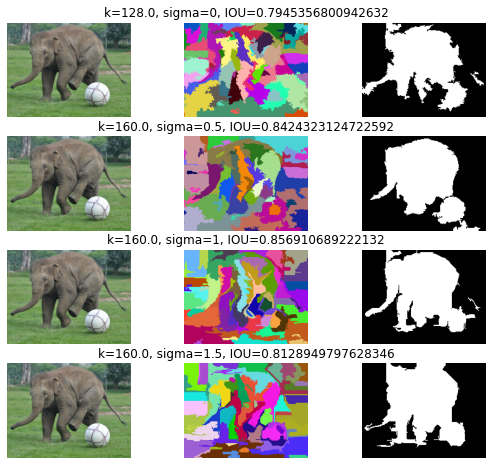

In [4]:
%%time
test(1)

Wall time: 12.7 s


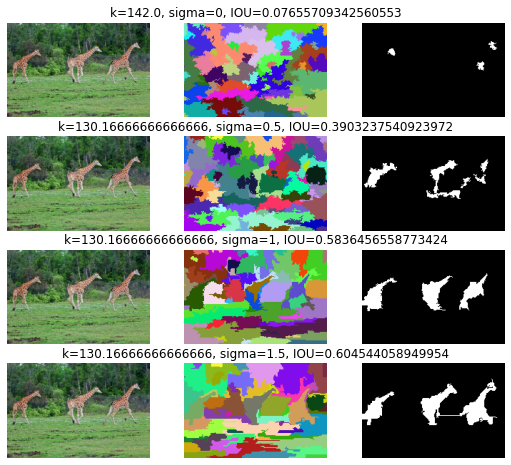

In [5]:
%%time
test(8)

Wall time: 15.9 s


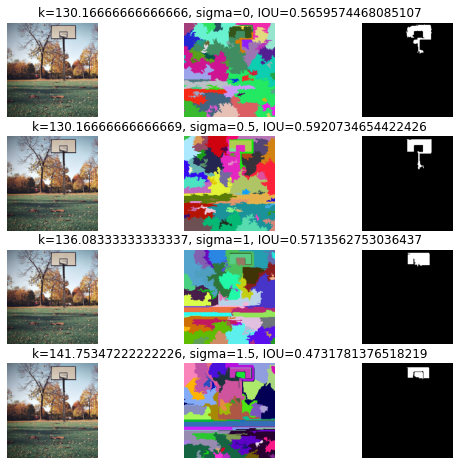

In [6]:
%%time
test(135)

Wall time: 17 s


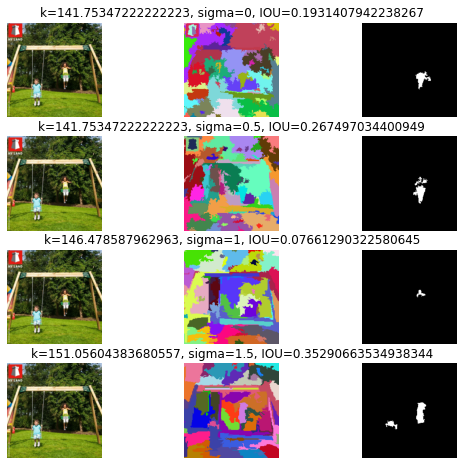

In [7]:
%%time
test(205)

In [8]:
with open('data/graph_based_image_segmentation/IOU.txt', 'w') as f:
    pass
sigma = 1.5
for i in tqdm(range(1, 1001)):
    src = cv2.imread('data/imgs/' + str(i) + '.png')
    mask = (cv2.imread('data/gt/' + str(i) + '.png')[:, :, 0] > 0)
    k, k_i, Id = gbis.Find_k(src.astype('float'), k, k_i, sigma)
    if Id is None:
        IOU = None
    else:
        dst, IOU = gbis.Mask(mask, Id)
        cv2.imwrite('data/graph_based_image_segmentation/res/' + str(i) + '.png', dst.astype(float))
    with open('data/graph_based_image_segmentation/IOU.txt', 'a') as f:
        f.write(str(IOU) + '\n')

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [40:53<00:00,  2.45s/it]


In [4]:
k = 1
k_i = 0

Wall time: 45.7 s


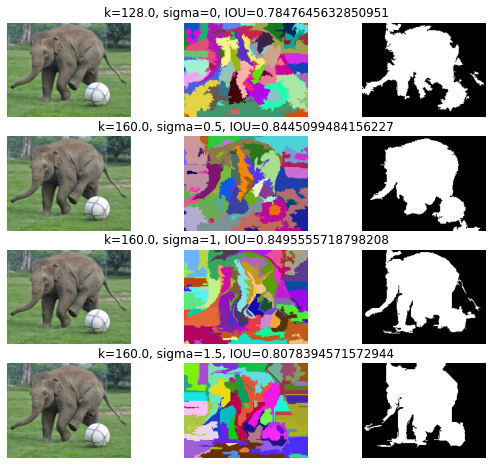

In [5]:
%%time
test(1, gbis.MergeMinimal)

Wall time: 14.1 s


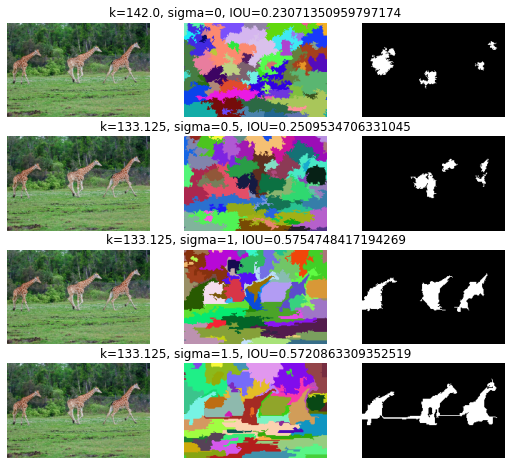

In [6]:
%%time
test(8, gbis.MergeMinimal)

Wall time: 15.8 s


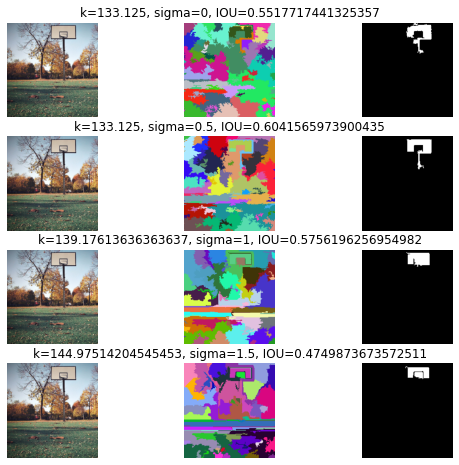

In [7]:
%%time
test(135, gbis.MergeMinimal)

Wall time: 15.2 s


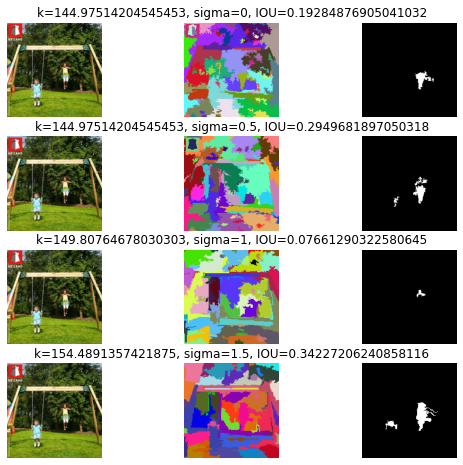

In [8]:
%%time
test(205, gbis.MergeMinimal)

In [4]:
k = 1
k_i = 0

Wall time: 39.6 s


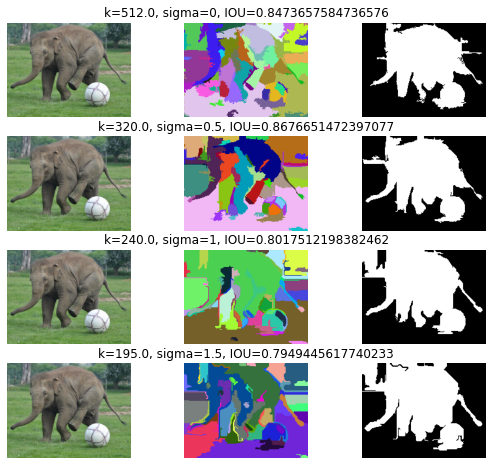

In [5]:
%%time
test(1, gray=True)

Wall time: 19.2 s


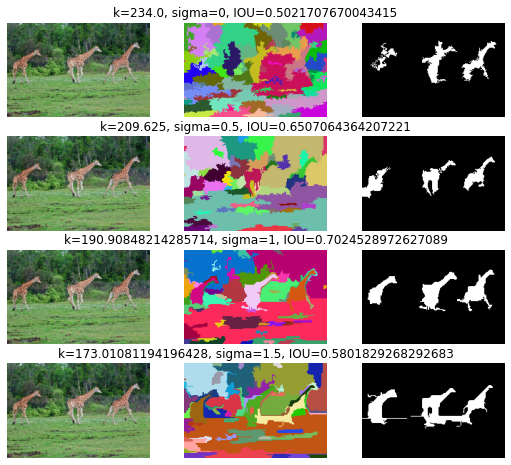

In [6]:
%%time
test(8, gray=True)

Wall time: 14.5 s


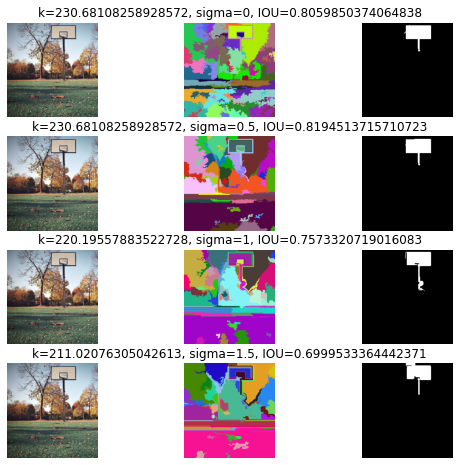

In [7]:
%%time
test(135, gray=True)

Wall time: 18.8 s


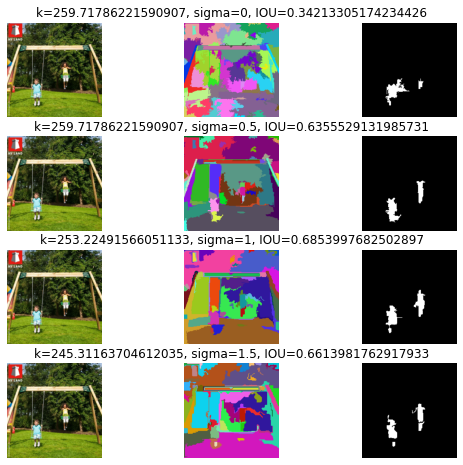

In [8]:
%%time
test(205, gray=True)

In [9]:
with open('data/graph_based_image_segmentation/IOU_gray.txt', 'w') as f:
    pass
sigma = 1
for i in tqdm(range(1, 1001)):
    src = cv2.imread('data/imgs/' + str(i) + '.png')
    mask = (cv2.imread('data/gt/' + str(i) + '.png')[:, :, 0] > 0)
    k, k_i, Id = gbis.Find_k(cv2.cvtColor(src, cv2.COLOR_BGR2GRAY).astype(float), k, k_i, sigma, gbis.MergeNeareast)
    if Id is None:
        IOU = None
    else:
        dst, IOU = gbis.Mask(mask, Id)
        cv2.imwrite('data/graph_based_image_segmentation/res_gray/' + str(i) + '.png', dst.astype(float))
    with open('data/graph_based_image_segmentation/IOU_gray.txt', 'a') as f:
        f.write(str(IOU) + '\n')

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [42:22<00:00,  2.54s/it]


In [10]:
k = 1
k_i = 0

Wall time: 1min 45s


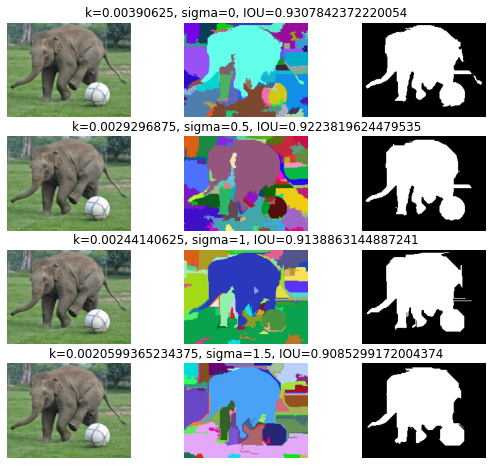

In [11]:
%%time
test(1, Dis=gbis.Cosine)

Wall time: 32 s


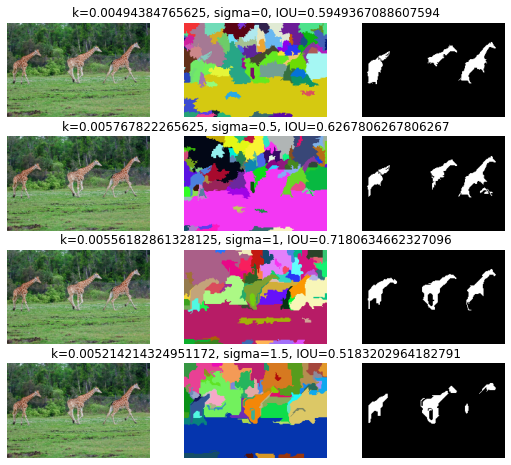

In [12]:
%%time
test(8, Dis=gbis.Cosine)

Wall time: 33.2 s


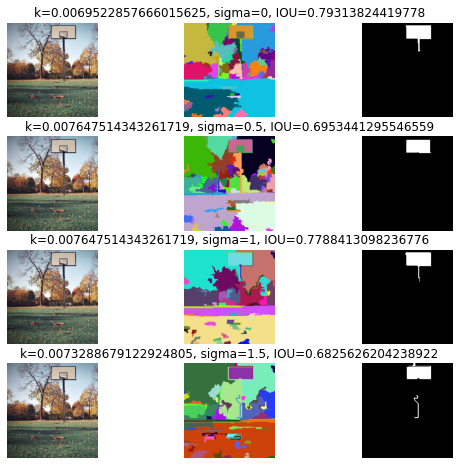

In [13]:
%%time
test(135, Dis=gbis.Cosine)

Wall time: 49.4 s


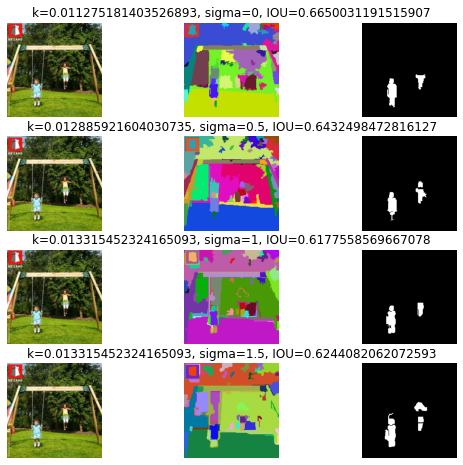

In [14]:
%%time
test(205, Dis=gbis.Cosine)

In [15]:
with open('data/graph_based_image_segmentation/IOU_cos.txt', 'w') as f:
    pass
sigma = 1
for i in tqdm(range(1, 1001)):
    src = cv2.imread('data/imgs/' + str(i) + '.png')
    mask = (cv2.imread('data/gt/' + str(i) + '.png')[:, :, 0] > 0)
    k, k_i, Id = gbis.Find_k(src.astype(float), k, k_i, sigma, gbis.MergeNeareast, gbis.Cosine)
    if Id is None:
        IOU = None
    else:
        dst, IOU = gbis.Mask(mask, Id)
        cv2.imwrite('data/graph_based_image_segmentation/res_cos/' + str(i) + '.png', dst.astype(float))
    with open('data/graph_based_image_segmentation/IOU_cos.txt', 'a') as f:
        f.write(str(IOU) + '\n')

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [2:55:40<00:00, 10.54s/it]


In [23]:
with open('data/graph_based_image_segmentation/IOU.txt') as f:
    lines = f.readlines()
    print('Baseline:')
    print('Accuracy:', sum([float(i[:-1]) if i != 'None\n' else 0 for i in lines]) / sum([1 if i != 'None\n' else 0 for i in lines]))
    print('None:', sum([1 if i == 'None\n' else 0 for i in lines]))
    print()
with open('data/graph_based_image_segmentation/IOU_gray.txt') as f:
    lines = f.readlines()
    print('Gray:')
    print('Accuracy:', sum([float(i[:-1]) if i != 'None\n' else 0 for i in lines]) / sum([1 if i != 'None\n' else 0 for i in lines]))
    print('None:', sum([1 if i == 'None\n' else 0 for i in lines]))
    print()
with open('data/graph_based_image_segmentation/IOU_cos.txt') as f:
    lines = f.readlines()
    print('Cosine:')
    print('Accuracy:', sum([float(i[:-1]) if i != 'None\n' else 0 for i in lines]) / sum([1 if i != 'None\n' else 0 for i in lines]))
    print('None:', sum([1 if i == 'None\n' else 0 for i in lines]))

Baseline:
Accuracy: 0.7005748352838914
None: 1

Gray:
Accuracy: 0.7415629955736334
None: 1

Cosine:
Accuracy: 0.7387268284361942
None: 1
